1. Claim that Tp/T relates to Yp/Y.
2. Analyze step
   a. Step response returns to normal
   b. How states change
3. Analyze ramp

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tellurium as te
from chemotaxis_model import ChemotaxisModel

In [75]:
# Runs simulation and creates global variables used in analysis
def sim():
    """
    Assumes that the model has been created. Names are created corresponding to the
    subset of states that are aggregated and the type of aggregation. An aggregation is
    either a total concentration, denoted by the prefix "t", or a fraction of the total
    concentration of receptors, denoted by "f". States have a three tuple: l, p, m. "l" is
    true (T) if the receptor is bound to a ligand; otherwise it is false. "p" is true if the
    receptor is phosphorylated; otherwise it is false. "m" is the level of methylation. If
    there is no specification for the state component, an underscore is used.
    For example, the fraction of receptors that are bound to ligands and are phosphorylated is
    denoted by "fTT_", and the total concentration of receptors that are bound to ligands,
    and have a methylation of 3 is "tT_3". The total concentration of receptors is all states
    is "t___". Note that "f___" should be 1.
    """
    # Construct the globals algorithmically using eval
    ligands = [True, False, None]
    phosphorylateds = [True, False, None]
    methylateds = [2, 3, 4, None]
    for l in ligands:
      for p in phosphorylateds:
        for m in methylateds:
          if l is None:
            name = "_"
          elif l:
            name = "T"
          else:
            name = "F"
          if p is None:
            name = name + "_"
          elif p:
            name = name + "T"
          else:
            name = name + "F"
          if m is None:
            name = name + "_"
          else:
            name = "%s%d" % (name, m)
          # Do totals
          tname = "t%s" % name
    global frLT, frLTp, frTp, frT, frLTp, frLT2, frLT2p, frLT3p,  \
    frLT3, frLT4, frLT4p, frLT, time, result, frYp, frBp, states, frp, frT2,  \
    frT3, frT4
    model.initialize()
    result = model.run(end=200)
    states = model.getReceptorStates()
    time = result['time']
    frLT = states.frcStates(lambda l,p,m: l)
    frLTp = states.frcStates(lambda l,p,m: l and p)
    frT = states.frcStates(lambda l,p,m: not l)
    frT2 = states.frcStates(lambda l,p,m: (not l) and m==2)
    frT3 = states.frcStates(lambda l,p,m: (not l) and m==3)
    frT4 = states.frcStates(lambda l,p,m: (not l) and m==4)
    frTp = states.frcStates(lambda l,p,m: p and not l)
    frp = states.frcStates(lambda l,p,m: p)
    frLT2 = states.frcStates(lambda l,p,m: l and m==2)
    frLT2p = states.frcStates(lambda l,p,m: l and p and m==2)
    frLT3 = states.frcStates(lambda l,p,m: l and m==3)
    frLT3p = states.frcStates(lambda l,p,m: l and p and m==3)
    frLT4 = states.frcStates(lambda l,p,m: l and m==4)
    frLT4p = states.frcStates(lambda l,p,m: l and p and m==4)
    frYp = model.getYpFraction()
    frBp = model.getBpFraction()


Relate Yp to state of receptor

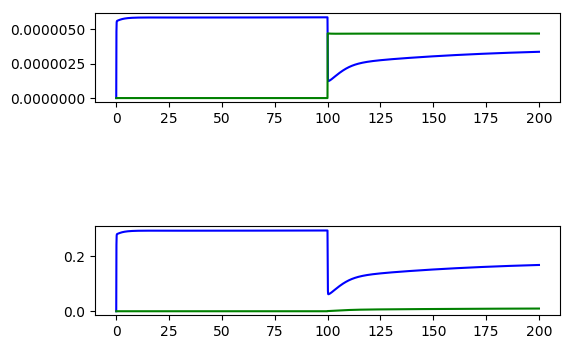

In [84]:
# Step Analysis


model = ChemotaxisModel()
model.appendToModel('''at (time > 100): L = 11e-6''')
sim()

P = states.sumStates(lambda l,p,m: p)
plt.subplot(3,1,1)
plt.plot( time, result['[Yp]'], 'b', time, result['[L]'], 'g')
plt.subplot(3,1,3)
plt.plot(time, frYp, 'b', time, frLTp, 'g')

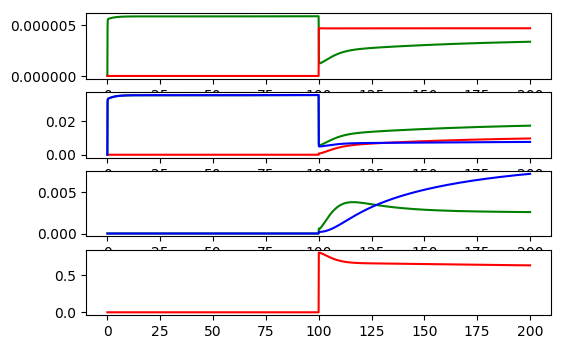

In [94]:
m = 4
n = 1
plt.subplot(m,1,n); n += 1
plt.plot(time, result['[Yp]'], 'g', time, result['[L]'], 'r')
plt.subplot(m,1,n); n+= 1
plt.plot(time,frLTp, 'r', time, frp, 'g', time, frTp, 'b')
plt.subplot(m,1,n); n += 1
plt.plot(time, frLT3p, 'g', time, frLT4p, 'b')
plt.subplot(m, 1, n)
plt.plot(time, frLT2, 'r')

Loosing some of the receptors as indicated in the above plot.

Ramp analysis

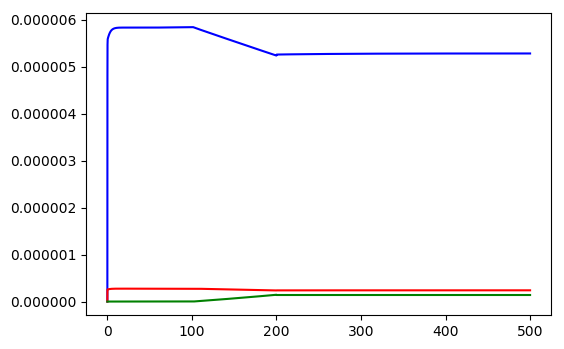

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tellurium as te
from chemotaxis_model import ChemotaxisModel

model = ChemotaxisModel()
#model.appendToModel('''at (time > 200): L = 0.11e-6''')
model.appendToModel('''at (time > 101): k0 = 0.011e-6''')
model.appendToModel('''at (time > 200): k0 = 0, L=0.11e-6''')
sim()

P = states.sumStates(lambda l,p,m: p)
plt.plot( time, result['[Yp]'], 'b', time, P, 'r', time, result['[L]'], 'g')
#rr.plot(result, xlim=[0, end_time])

Questions:
1. Why doesn't Yp return to its pre-ramp state?
2. 
Observations:
1. P drops to 0 at time

In [ ]:
frp = states.frcStates(lambda l,p,m: p)
frLTp = states.frcStates(lambda l,p,m: l and p)
plt.subplot(4,1,1)
plt.plot( time, frp, 'b', time, frTp, 'r', time, frLTp, 'g')
plt.subplot(4,1,3)
frL = states.frcStates(lambda l,p,m: l)
plt.plot( time, frL, 'r', time, frLT4, 'g', time, frLT4p, 'b')

In [ ]:
frLTp

Expected to see an impulse response in response to the step input. But see a step response in Yp.

In [ ]:
Ids = ['J11', 'J12', 'J3']
{id: model.getReactionRateForId(id) for id in Ids}